# BUSINESS STRATEGY FOR OPENING THIRD WAVE COFFEE SHOP IN NEW YORK CITY

In [1]:
!conda install -c conda-forge beautifulsoup4 --yes
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium=0.5.0 --yes
!conda install -c conda-forge lxml --yes
!conda install -c conda-forge requests --yes
!conda install -c conda-forge html5lib --yes

print('Libraries installed!')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    scipy-1.4.1                |   py36h921218d_0        18.9 MB  conda-forge
    beautifulsoup4-4.8.2       |           py36_0         157 KB  conda-forg

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't installed
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle; requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns

import matplotlib.cm as cm
import matplotlib.colors as colors

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from bs4 import BeautifulSoup 
import csv # implements classes to read and write tabular data in CSV form

print('Libraries imported.')

Libraries imported.


In [3]:
# The code was removed by Watson Studio for sharing.

### Defining Functions for Easier Access Later

In [4]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # getting all the data from json file
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from Foursquare API
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data= new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

In [6]:
# NYC Neighborhoods Data
ny_ngh = get_new_york_data() 
ny_ngh.head(20)

Borough        Neighborhood   Latitude  Longitude
0       Bronx           Wakefield  40.894705 -73.847201
1       Bronx          Co-op City  40.874294 -73.829939
2       Bronx         Eastchester  40.887556 -73.827806
3       Bronx           Fieldston  40.895437 -73.905643
4       Bronx           Riverdale  40.890834 -73.912585
5       Bronx         Kingsbridge  40.881687 -73.902818
6   Manhattan         Marble Hill  40.876551 -73.910660
7       Bronx            Woodlawn  40.898273 -73.867315
8       Bronx             Norwood  40.877224 -73.879391
9       Bronx      Williamsbridge  40.881039 -73.857446
10      Bronx          Baychester  40.866858 -73.835798
11      Bronx      Pelham Parkway  40.857413 -73.854756
12      Bronx         City Island  40.847247 -73.786488
13      Bronx        Bedford Park  40.870185 -73.885512
14      Bronx  University Heights  40.855727 -73.910416
15      Bronx      Morris Heights  40.847898 -73.919672
16      Bronx             Fordham  40.860997 -73.896427
17      Bronx        East Tremont  40.842696 -73.887356
18      Bronx          West Farms  40.839475 -73.877745
19      Bronx        High  Bridge  40.836623 -73.926102

In [7]:
print('The New York City has {} boroughs and {} neighborhoods.'.format(
        len(ny_ngh['Borough'].unique()),
        ny_ngh.shape[0])
     )

The New York City has 5 boroughs and 306 neighborhoods.


In [8]:
ny_ngh.to_csv('NYC_GEO.csv',index=False)

### Neighborhoods per Borough in New York City

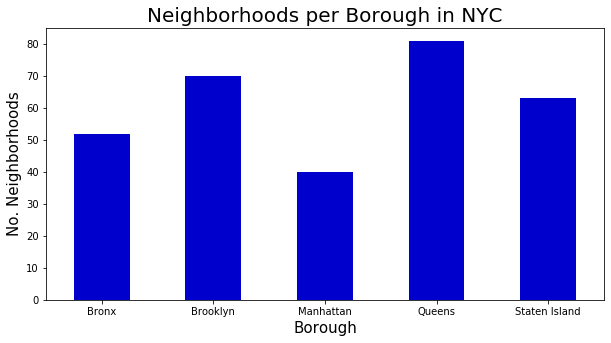

In [9]:
clr = "mediumblue"
ny_ngh.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Borough in NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [13]:
def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # getting all the data from json file
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

column_names=['Borough', 'Neighborhood', 'ID','Name']
coffee_shops_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_ngh.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    coffee_shops=venues[venues['Category']=='Coffee Shop']   
    print('(',count,'/',len(ny_ngh),')','Coffee Shops in '+Neighborhood+', '+Borough+':'+str(len(coffee_shops)))
    print(row)
    for coffee_shop_detail in coffee_shops.values.tolist():
        id, name , category = coffee_shop_detail
        coffee_shops_ny = coffee_shops_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Coffee Shops in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Coffee Shops in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Coffee Shops in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Coffee Shops in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Coffee Shops in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Coffee Shops in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Coffee Shops in Marble Hill, Manhattan:1
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Coffee Shops in Woodlawn, Bronx:0
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Coffee Shops in Norwood, Bronx:1
['Bronx', 'Norwood', 40.87722415599446, -73.8793907395681]
( 10 /

In [14]:
coffee_shops_ny.head(40)

Borough        Neighborhood                        ID  \
0   Manhattan         Marble Hill  57655be738faa66160da7527   
1       Bronx             Norwood  4c6d5ce5e6b7b1f7af76a98e   
2       Bronx      Pelham Parkway  4bb62b326edc76b05d80301c   
3       Bronx          West Farms  4baa3cfff964a52081563ae3   
4       Bronx          Mott Haven  4e69f6bc52b1c1205f94e51e   
5       Bronx            Van Nest  4c1c5630e9c4ef3b4ccd45aa   
6       Bronx     North Riverdale  4b8d1887f964a520aae732e3   
7    Brooklyn           Bay Ridge  57cb4cca498e310e8f4a2f78   
8    Brooklyn          Greenpoint  518cf9ec498e8c38bda0268d   
9    Brooklyn          Greenpoint  58b6e16ffc73d40233da9715   
10   Brooklyn          Greenpoint  576eb1f5cd10a371033f7ad6   
11   Brooklyn          Greenpoint  4d8f7d48d265236a02c72117   
12   Brooklyn          Greenpoint  575467b1498e848fce847ca1   
13   Brooklyn      Brighton Beach  4b59aedcf964a520999228e3   
14   Brooklyn            Flatbush  5172b2d4498e646485496d05   
15   Brooklyn       Crown Heights  4d2b2d3b3c795481e27ee69b   
16   Brooklyn     Windsor Terrace  4a397422f964a520769f1fe3   
17   Brooklyn    Prospect Heights  4a2407e6f964a520ef7d1fe3   
18   Brooklyn    Prospect Heights  5a6cc216f5e9d763b7a37c8f   
19   Brooklyn        Williamsburg  5d8663bddfbfcc0007278c66   
20   Brooklyn        Williamsburg  55b02e05498ef881a3a44c6d   
21   Brooklyn        Williamsburg  5659be63498e1bd863c1e601   
22   Brooklyn            Bushwick  55e9fe71498e8edb034385a7   
23   Brooklyn            Bushwick  56b8c8aa498e095e6ff4b065   
24   Brooklyn            Bushwick  54c595e2498e9ffb3d369250   
25   Brooklyn            Bushwick  5ca8ea3cd4cc980039e3729c   
26   Brooklyn  Bedford Stuyvesant  56bf7516cd1024b6713b3563   
27   Brooklyn  Bedford Stuyvesant  52a102da11d29a428cb564e7   
28   Brooklyn    Brooklyn Heights  59d7872e5a2c911745c2e8ca   
29   Brooklyn         Cobble Hill  59c2c26635f9837e08397ef4   
30   Brooklyn         Cobble Hill  580d0a4838fa8cf0e28e76c2   
31   Brooklyn         Cobble Hill  5b930cafb77c77002c38373b   
32   Brooklyn     Carroll Gardens  58d933702f91cb026f478e38   
33   Brooklyn     Carroll Gardens  5d7ce692b4fc9c0008394021   
34   Brooklyn     Carroll Gardens  5afda093012358002cfdbd9b   
35   Brooklyn     Carroll Gardens  5ab6635edb1d812e09c3bc11   
36   Brooklyn     Carroll Gardens  5970b104b9ac383dd3f059c2   
37   Brooklyn     Carroll Gardens  49e49a74f964a52010631fe3   
38   Brooklyn            Red Hook  4cf111d0899c6ea8bf48eec1   
39   Brooklyn         Fort Greene  49b79e04f964a5202b531fe3   

                           Name  
0                     Starbucks  
1           Nicky's Coffee Shop  
2   Liberty Donut & Coffee Shop  
3          Prospect Coffee Shop  
4                   Brook Lunch  
5         Conti's Pastry Shoppe  
6            Noni's Coffee Shop  
7                    Caffe Café  
8                    Homecoming  
9                       odd fox  
10                        Maman  
11               Upright Coffee  
12             Café de Colombia  
13                    Starbucks  
14                   Coffee Mob  
15          Jenny Coffe Shop #2  
16   DUB Pies - Windsor Terrace  
17                 Sit & Wonder  
18        Gran Caffe De Martini  
19                    Konditori  
20   The Flat's BK Speed Coffee  
21                    Northerly  
22                       Dweebs  
23                Brooklyn Kava  
24        Bushwick Public House  
25        Lazy Suzy Cafe & Shop  
26              Brooklyn Kettle  
27                Crocus Coffee  
28                   Joe Coffee  
29                  Fare & Folk  
30                  Espresso Me  
31                 Salter House  
32     East One Coffee Roasters  
33                 Hungry Ghost  
34                      Planted  
35                  Bklyn Habit  
36                Velvette Brew  
37      D'Amico Coffee Roasters  
38         Red Hook coffee shop  
39                  Bittersweet

#### Since Requesting Each Time This Data is not Sufficient, I will save it as a csv  file

In [15]:
coffee_shops_ny.to_csv('coffee_shops_ny.csv', index = False) # Save the information so far to a .csv file due to limited calls on FourSquare

In [16]:
coffee_shops_ny = pd.read_csv('coffee_shops_ny.csv')
coffee_shops_ny.shape

(228, 4)

## Coffee Shop Stats

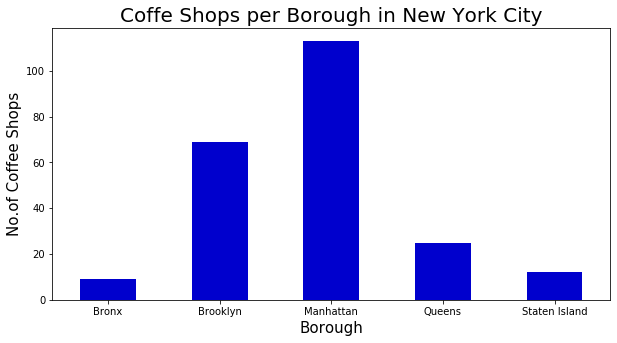

In [17]:
coffee_shops_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color = clr)
plt.title('Coffe Shops per Borough in New York City', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No.of Coffee Shops', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()


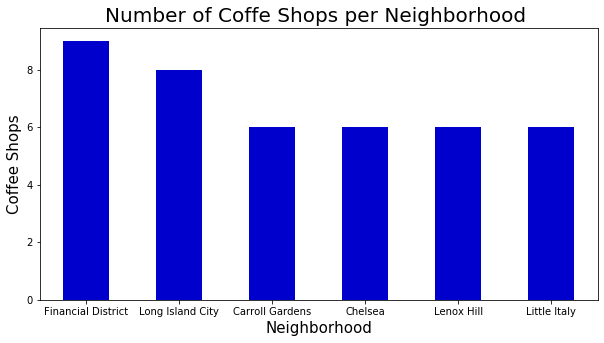

In [18]:
NOofNeigh = 6 # top number for graphing all the same past 6
coffee_shops_ny.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(10,5), color=clr)
plt.title('Number of Coffe Shops per Neighborhood ', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('Coffee Shops', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [20]:
coffee_shops_ny.head(20)

Borough      Neighborhood                        ID  \
0   Manhattan       Marble Hill  57655be738faa66160da7527   
1       Bronx           Norwood  4c6d5ce5e6b7b1f7af76a98e   
2       Bronx    Pelham Parkway  4bb62b326edc76b05d80301c   
3       Bronx        West Farms  4baa3cfff964a52081563ae3   
4       Bronx        Mott Haven  4e69f6bc52b1c1205f94e51e   
5       Bronx          Van Nest  4c1c5630e9c4ef3b4ccd45aa   
6       Bronx   North Riverdale  4b8d1887f964a520aae732e3   
7    Brooklyn         Bay Ridge  57cb4cca498e310e8f4a2f78   
8    Brooklyn        Greenpoint  518cf9ec498e8c38bda0268d   
9    Brooklyn        Greenpoint  58b6e16ffc73d40233da9715   
10   Brooklyn        Greenpoint  576eb1f5cd10a371033f7ad6   
11   Brooklyn        Greenpoint  4d8f7d48d265236a02c72117   
12   Brooklyn        Greenpoint  575467b1498e848fce847ca1   
13   Brooklyn    Brighton Beach  4b59aedcf964a520999228e3   
14   Brooklyn          Flatbush  5172b2d4498e646485496d05   
15   Brooklyn     Crown Heights  4d2b2d3b3c795481e27ee69b   
16   Brooklyn   Windsor Terrace  4a397422f964a520769f1fe3   
17   Brooklyn  Prospect Heights  4a2407e6f964a520ef7d1fe3   
18   Brooklyn  Prospect Heights  5a6cc216f5e9d763b7a37c8f   
19   Brooklyn      Williamsburg  5d8663bddfbfcc0007278c66   

                           Name  
0                     Starbucks  
1           Nicky's Coffee Shop  
2   Liberty Donut & Coffee Shop  
3          Prospect Coffee Shop  
4                   Brook Lunch  
5         Conti's Pastry Shoppe  
6            Noni's Coffee Shop  
7                    Caffe Café  
8                    Homecoming  
9                       odd fox  
10                        Maman  
11               Upright Coffee  
12             Café de Colombia  
13                    Starbucks  
14                   Coffee Mob  
15          Jenny Coffe Shop #2  
16   DUB Pies - Windsor Terrace  
17                 Sit & Wonder  
18        Gran Caffe De Martini  
19                    Konditori

## Ratings and Likes

In [18]:
def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # getting all the data from json file
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

def get_venue_details(venue_id):
    #url to fetch data from Foursquare API
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [21]:
coffee_shops_ny.shape

(228, 4)

## Splitting Coffee Shops DataFrame for Foursquare API Daily Quota 

In [22]:
coffee_shops_ny_split = np.array_split(coffee_shops_ny,5)

### Chunk Number 0 

In [23]:
coffee_shops_ny_split[0].shape

(46, 4)

In [24]:
coffee_shops_ny_split[0].head(10)

Borough     Neighborhood                        ID  \
0  Manhattan      Marble Hill  57655be738faa66160da7527   
1      Bronx          Norwood  4c6d5ce5e6b7b1f7af76a98e   
2      Bronx   Pelham Parkway  4bb62b326edc76b05d80301c   
3      Bronx       West Farms  4baa3cfff964a52081563ae3   
4      Bronx       Mott Haven  4e69f6bc52b1c1205f94e51e   
5      Bronx         Van Nest  4c1c5630e9c4ef3b4ccd45aa   
6      Bronx  North Riverdale  4b8d1887f964a520aae732e3   
7   Brooklyn        Bay Ridge  57cb4cca498e310e8f4a2f78   
8   Brooklyn       Greenpoint  518cf9ec498e8c38bda0268d   
9   Brooklyn       Greenpoint  58b6e16ffc73d40233da9715   

                          Name  
0                    Starbucks  
1          Nicky's Coffee Shop  
2  Liberty Donut & Coffee Shop  
3         Prospect Coffee Shop  
4                  Brook Lunch  
5        Conti's Pastry Shoppe  
6           Noni's Coffee Shop  
7                   Caffe Café  
8                   Homecoming  
9                      odd fox

In [24]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
coffee_shops_stats_ny_split_0 = pd.DataFrame(columns=column_names)
count=1
for row in coffee_shops_ny_split[0].values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        #print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        #print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(coffee_shops_ny),')','processed')
    coffee_shops_stats_ny_split_0 = coffee_shops_stats_ny_split_0.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

{'meta': {'code': 200, 'requestId': '5e1ef449bae9a20026e19d61'}, 'response': {'venue': {'id': '57655be738faa66160da7527', 'name': 'Starbucks', 'contact': {}, 'location': {'address': '50 W 225th St', 'lat': 40.873754554218515, 'lng': -73.90861305343668, 'labeledLatLngs': [{'label': 'display', 'lat': 40.873754554218515, 'lng': -73.90861305343668}], 'postalCode': '10463', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['50 W 225th St', 'New York, NY 10463', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/57655be738faa66160da7527', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 7, 'groups': [{'type': 'o

In [25]:
coffee_shops_stats_ny_split_0.head(10)

Borough     Neighborhood                        ID  \
0  Manhattan      Marble Hill  57655be738faa66160da7527   
1      Bronx          Norwood  4c6d5ce5e6b7b1f7af76a98e   
2      Bronx          Norwood                         0   
3      Bronx   Pelham Parkway  4bb62b326edc76b05d80301c   
4      Bronx       West Farms                         0   
5      Bronx         Van Nest  4c1c5630e9c4ef3b4ccd45aa   
6      Bronx  North Riverdale  4b8d1887f964a520aae732e3   
7   Brooklyn        Bay Ridge  57cb4cca498e310e8f4a2f78   
8   Brooklyn        Bay Ridge  4d98831fdaec224bfb214a3e   
9   Brooklyn       Greenpoint  518cf9ec498e8c38bda0268d   

                          Name Likes  Rating Tips  
0                    Starbucks     7     7.1    0  
1          Nicky's Coffee Shop    12     7.7   11  
2                            0     0     0.0    0  
3  Liberty Donut & Coffee Shop    14     7.0    8  
4                            0     0     0.0    0  
5        Conti's Pastry Shoppe    47     8.5   15  
6           Noni's Coffee Shop     8     7.3    5  
7                   Caffe Café     7     7.4    2  
8             Mocha Mocha Cafe    49     6.7   38  
9                   Homecoming   213     8.9   43

In [26]:
coffee_shops_stats_ny_split_0.shape

(46, 7)

In [27]:
coffee_shops_stats_ny_split_0.to_csv('coffee_shops_stats_ny_split_0.csv',index=False)

### Chunk Number 1

In [25]:
coffee_shops_ny_split[1].shape

(45, 4)

In [26]:
coffee_shops_ny_split[1].head(10)

Borough       Neighborhood                        ID  \
46  Brooklyn      Cypress Hills  4cc366b006c2548145629047   
47  Brooklyn           Downtown  5ac4c1a3646e385d9e73f4d1   
48  Brooklyn           Downtown  5a6395d32105c3555b679f6e   
49  Brooklyn           Downtown  59946d393b830745ce06bd87   
50  Brooklyn           Downtown  596e39fa1755625c977b3579   
51  Brooklyn        Boerum Hill  5831d03488cfcc313b5924b2   
52  Brooklyn        Boerum Hill  5ac4c1a3646e385d9e73f4d1   
53  Brooklyn         Ocean Hill  58bad25c4bc2f1632aace318   
54  Brooklyn         Georgetown  5c0ae329898bdc002c5d08f9   
55  Brooklyn  East Williamsburg  55aad5ad498e3edffdc18580   

                              Name  
46  Mexican Restaurant Coffee Shop  
47                        Devoción  
48                    Hungry Ghost  
49                       Starbucks  
50               Starbucks Reserve  
51                      dot & line  
52                        Devoción  
53              Daily Press Coffee  
54                       Starbucks  
55  City of Saints Coffee Roasters

In [27]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
coffee_shops_stats_ny_split_1 = pd.DataFrame(columns=column_names)
count=1
for row in coffee_shops_ny_split[1].values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        # print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        # print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(coffee_shops_ny),')','processed')
    coffee_shops_stats_ny_split_1 = coffee_shops_stats_ny_split_1.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

{'meta': {'code': 200, 'requestId': '5e21ce513907e700220b9c56'}, 'response': {'venue': {'id': '4cc366b006c2548145629047', 'name': 'Mexican Restaurant Coffee Shop', 'contact': {}, 'location': {'address': '33-25 Fulton St', 'lat': 40.683627, 'lng': -73.872922, 'labeledLatLngs': [{'label': 'display', 'lat': 40.683627, 'lng': -73.872922}], 'postalCode': '11208', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['33-25 Fulton St', 'Brooklyn, NY 11208', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mexican-restaurant-coffee-shop/4cc366b006c2548145629047', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 2}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': 

In [28]:
coffee_shops_stats_ny_split_1.head(10)

Borough       Neighborhood                        ID  \
0  Brooklyn      Cypress Hills                         0   
1  Brooklyn           Downtown  5ac4c1a3646e385d9e73f4d1   
2  Brooklyn           Downtown  5a6395d32105c3555b679f6e   
3  Brooklyn           Downtown  59946d393b830745ce06bd87   
4  Brooklyn           Downtown  596e39fa1755625c977b3579   
5  Brooklyn        Boerum Hill  5831d03488cfcc313b5924b2   
6  Brooklyn        Boerum Hill  5ac4c1a3646e385d9e73f4d1   
7  Brooklyn         Ocean Hill  58bad25c4bc2f1632aace318   
8  Brooklyn         Georgetown  5c0ae329898bdc002c5d08f9   
9  Brooklyn  East Williamsburg  55aad5ad498e3edffdc18580   

                             Name Likes Rating Tips  
0                               0     0      0    0  
1                        Devoción   164    8.8   31  
2                    Hungry Ghost    44    8.9    7  
3                       Starbucks     0    7.2    0  
4               Starbucks Reserve     2      7    1  
5                      dot & line   105    8.7   18  
6                        Devoción   164    8.8   31  
7              Daily Press Coffee    33    8.3    8  
8                       Starbucks     3    7.2    2  
9  City of Saints Coffee Roasters   128    8.4   19

In [29]:
coffee_shops_stats_ny_split_1.shape

(45, 7)

In [30]:
coffee_shops_stats_ny_split_1.to_csv('coffee_shops_stats_ny_split_1.csv',index=False)

### Chunk Number 2 

In [31]:
coffee_shops_ny_split[2].shape

(45, 4)

In [32]:
coffee_shops_ny_split[2].head(10)

Borough    Neighborhood                        ID  \
91   Manhattan  Lincoln Square  59d227261987ec64e6c341f0   
92   Manhattan         Clinton  5dd83fae6690dd00088cb92f   
93   Manhattan         Clinton  5c683caaf96b2c00397a8609   
94   Manhattan         Clinton  526d9114498ec8efda93fcce   
95   Manhattan         Clinton  3fd66200f964a52093e81ee3   
96   Manhattan         Midtown  5491e424498e93529c115699   
97   Manhattan         Midtown  54566365498e4fb5ed4fe987   
98   Manhattan         Midtown  59078c905d891b3723d5d6c4   
99   Manhattan         Midtown  4b0ea0f0f964a520175923e3   
100  Manhattan         Midtown  57f27362498ef61538900f04   

                        Name  
91                 Starbucks  
92                 Starbucks  
93      Oslo Coffee Roasters  
94   Romeo and Juliet Coffee  
95       Empire Coffee & Tea  
96            Bluestone Lane  
97        Blue Bottle Coffee  
98        Joe Coffee Company  
99           Gregorys Coffee  
100  La Colombe Torrefaction

In [33]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
coffee_shops_stats_ny_split_2 = pd.DataFrame(columns=column_names)
count=1
for row in coffee_shops_ny_split[2].values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        #print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        #print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(coffee_shops_ny),')','processed')
    coffee_shops_stats_ny_split_2 = coffee_shops_stats_ny_split_2.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

{'meta': {'code': 200, 'requestId': '5e236c3971c428001be42a46'}, 'response': {'venue': {'id': '59d227261987ec64e6c341f0', 'name': 'Starbucks', 'contact': {}, 'location': {'address': '21 W End Ave', 'lat': 40.772881326005155, 'lng': -73.98966642591233, 'labeledLatLngs': [{'label': 'display', 'lat': 40.772881326005155, 'lng': -73.98966642591233}], 'postalCode': '10023', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['21 W End Ave', 'New York, NY 10023', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/59d227261987ec64e6c341f0', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 4}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 17, 'groups': [{'type': 'ot

In [34]:
coffee_shops_stats_ny_split_2.head(10)

Borough    Neighborhood                        ID  \
0  Manhattan  Lincoln Square  59d227261987ec64e6c341f0   
1  Manhattan         Clinton  5dd83fae6690dd00088cb92f   
2  Manhattan         Clinton  5c683caaf96b2c00397a8609   
3  Manhattan         Clinton  526d9114498ec8efda93fcce   
4  Manhattan         Clinton  3fd66200f964a52093e81ee3   
5  Manhattan         Midtown  5491e424498e93529c115699   
6  Manhattan         Midtown  54566365498e4fb5ed4fe987   
7  Manhattan         Midtown  59078c905d891b3723d5d6c4   
8  Manhattan         Midtown  4b0ea0f0f964a520175923e3   
9  Manhattan         Midtown  57f27362498ef61538900f04   

                      Name Likes  Rating Tips  
0                Starbucks    17     7.2    4  
1                Starbucks     0     8.2    1  
2     Oslo Coffee Roasters     6     8.2    5  
3  Romeo and Juliet Coffee   105     7.4   36  
4      Empire Coffee & Tea   111     7.6   56  
5           Bluestone Lane   397     8.5   77  
6       Blue Bottle Coffee   731     9.0  145  
7       Joe Coffee Company    23     8.3    4  
8          Gregorys Coffee   399     7.8  154  
9  La Colombe Torrefaction   228     9.1   25

In [35]:
coffee_shops_stats_ny_split_2.shape

(45, 7)

In [36]:
coffee_shops_stats_ny_split_2.to_csv('coffee_shops_stats_ny_split_2.csv',index=False)

### Chunk Number 3

In [21]:
coffee_shops_ny_split[3].shape

(45, 4)

In [22]:
coffee_shops_ny_split[3].head(10)

Borough        Neighborhood                        ID  \
136  Manhattan            Gramercy  52486d18498e1fc73902b4e6   
137  Manhattan   Battery Park City  57210afa498ecfbb8c1be6cc   
138  Manhattan   Battery Park City  4ce41f161594236ac316fb49   
139  Manhattan   Battery Park City  50202b0ee4b0cabb110c01a2   
140  Manhattan   Battery Park City  591ddfde31ac6c01ff11cbab   
141  Manhattan  Financial District  574456e5498e39c73d234da1   
142  Manhattan  Financial District  561a8cd8498ed81f4384d0aa   
143  Manhattan  Financial District  5cf965947564f7002c79aa21   
144  Manhattan  Financial District  500d3cede4b0f6804faa90a8   
145  Manhattan  Financial District  4a9ff5d9f964a520ba3d20e3   

                          Name  
136                  Starbucks  
137         Le District Coffee  
138          Starbucks Reserve  
139  Laughing Man Coffee & Tea  
140                 Joe Coffee  
141       Black Fox Coffee Co.  
142    La Colombe Torrefaction  
143   For Five Coffee Roasters  
144      Blue Spoon Coffee Co.  
145                  Starbucks

In [23]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
coffee_shops_stats_ny_split_3 = pd.DataFrame(columns=column_names)
count=1
for row in coffee_shops_ny_split[3].values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(coffee_shops_ny),')','processed')
    coffee_shops_stats_ny_split_3 = coffee_shops_stats_ny_split_3.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

{'meta': {'code': 200, 'requestId': '5e2454643907e700224852da'}, 'response': {'venue': {'id': '52486d18498e1fc73902b4e6', 'name': 'Starbucks', 'contact': {'phone': '2126734213', 'formattedPhone': '(212) 673-4213', 'twitter': 'starbucks', 'instagram': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '400 E 23rd st', 'crossStreet': 'at 1st Ave', 'lat': 40.736546, 'lng': -73.97838, 'labeledLatLngs': [{'label': 'display', 'lat': 40.736546, 'lng': -73.97838}], 'postalCode': '10010', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['400 E 23rd st (at 1st Ave)', 'New York, NY 10010', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/52486d18498e1fc73902b4e6', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/foo

In [24]:
coffee_shops_stats_ny_split_3.head(10)

Borough        Neighborhood                        ID  \
0  Manhattan            Gramercy  52486d18498e1fc73902b4e6   
1  Manhattan   Battery Park City  57210afa498ecfbb8c1be6cc   
2  Manhattan   Battery Park City  4ce41f161594236ac316fb49   
3  Manhattan   Battery Park City  50202b0ee4b0cabb110c01a2   
4  Manhattan   Battery Park City  591ddfde31ac6c01ff11cbab   
5  Manhattan  Financial District  574456e5498e39c73d234da1   
6  Manhattan  Financial District  561a8cd8498ed81f4384d0aa   
7  Manhattan  Financial District  5cf965947564f7002c79aa21   
8  Manhattan  Financial District  500d3cede4b0f6804faa90a8   
9  Manhattan  Financial District  4a9ff5d9f964a520ba3d20e3   

                        Name Likes  Rating Tips  
0                  Starbucks   124     6.8   11  
1         Le District Coffee    67     8.1    7  
2          Starbucks Reserve    70     8.4   24  
3  Laughing Man Coffee & Tea   166     7.7   50  
4                 Joe Coffee    49     7.7    5  
5       Black Fox Coffee Co.   407     9.2   96  
6    La Colombe Torrefaction   272     8.7   53  
7   For Five Coffee Roasters    11     8.9    2  
8      Blue Spoon Coffee Co.   305     8.5  108  
9                  Starbucks   374     7.9   75

In [25]:
coffee_shops_stats_ny_split_3.shape

(45, 7)

In [26]:
coffee_shops_stats_ny_split_3.to_csv('coffee_shops_stats_ny_split_3.csv',index=False)

### Chunk Number 4

In [16]:
coffee_shops_ny_split[4].shape

(45, 4)

In [17]:
coffee_shops_ny_split[4].head(10)

Borough   Neighborhood                        ID  \
181  Staten Island     Charleston  4bfc55f2da7120a138e949fd   
182  Staten Island  Arden Heights  4dac5c0cbd4197f68356a579   
183      Manhattan  Carnegie Hill  5b784d8d037be1002c195155   
184      Manhattan  Carnegie Hill  599d7c7e61f0700d414c282b   
185      Manhattan  Carnegie Hill  51ae935b7dd2de27a217609e   
186      Manhattan  Carnegie Hill  5330323b498e2836f173cf9e   
187      Manhattan           Noho  56c73a4a498ea736d7388245   
188      Manhattan           Noho  52a08dfd11d2c0b1f8dc28f6   
189      Manhattan           Noho  5682a50a498e25a5a1d870a2   
190      Manhattan           Noho  4f22b060e4b02a95fc886761   

                               Name  
181                       Starbucks  
182                 APlus at Sunoco  
183         Jack’s Stir Brew Coffee  
184                    Birch Coffee  
185                            DTUT  
186                       Starbucks  
187            Ludlow Coffee Supply  
188                         Mudpark  
189       The Lazy Llama Coffee Bar  
190  Caffe Vita Coffee Roasting Co.

In [18]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
coffee_shops_stats_ny_split_4 = pd.DataFrame(columns=column_names)
count=1
for row in coffee_shops_ny_split[4].values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(coffee_shops_ny),')','processed')
    coffee_shops_stats_ny_split_4 = coffee_shops_stats_ny_split_4.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

{'meta': {'code': 200, 'requestId': '5e25462078a484001bc064fc'}, 'response': {'venue': {'id': '4bfc55f2da7120a138e949fd', 'name': 'Starbucks', 'contact': {'phone': '7187016206', 'formattedPhone': '(718) 701-6206', 'twitter': 'starbucks', 'instagram': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '2900 Veterans Rd W', 'crossStreet': 'at Target', 'lat': 40.52828, 'lng': -74.233315, 'labeledLatLngs': [{'label': 'display', 'lat': 40.52828, 'lng': -74.233315}], 'postalCode': '10309', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2900 Veterans Rd W (at Target)', 'Staten Island, NY 10309', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4bfc55f2da7120a138e949fd', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img

In [19]:
coffee_shops_stats_ny_split_4.head(10)

Borough   Neighborhood                        ID  \
0  Staten Island     Charleston  4bfc55f2da7120a138e949fd   
1  Staten Island  Arden Heights  4dac5c0cbd4197f68356a579   
2      Manhattan  Carnegie Hill  5b784d8d037be1002c195155   
3      Manhattan  Carnegie Hill  599d7c7e61f0700d414c282b   
4      Manhattan  Carnegie Hill  51ae935b7dd2de27a217609e   
5      Manhattan  Carnegie Hill  5330323b498e2836f173cf9e   
6      Manhattan           Noho  56c73a4a498ea736d7388245   
7      Manhattan           Noho  52a08dfd11d2c0b1f8dc28f6   
8      Manhattan           Noho  5682a50a498e25a5a1d870a2   
9      Manhattan           Noho  4f22b060e4b02a95fc886761   

                             Name Likes  Rating Tips  
0                       Starbucks     6     6.5    2  
1                 APlus at Sunoco     8     6.7    6  
2         Jack’s Stir Brew Coffee    13     8.5    0  
3                    Birch Coffee    78     8.5   14  
4                            DTUT   517     8.5  152  
5                       Starbucks    83     7.4   14  
6            Ludlow Coffee Supply   274     8.9   56  
7                         Mudpark   139     8.7   30  
8       The Lazy Llama Coffee Bar    79     8.6   22  
9  Caffe Vita Coffee Roasting Co.   317     8.7   97

In [20]:
coffee_shops_stats_ny_split_4.shape

(45, 7)

In [21]:
coffee_shops_stats_ny_split_4.to_csv('coffee_shops_stats_ny_split_4.csv',index=False)

## Merging All Chunks of Stats Data Into a Single DataFrame

In [25]:
split0 = pd.read_csv('coffee_shops_stats_ny_split_0.csv')

In [26]:
split1 = pd.read_csv('coffee_shops_stats_ny_split_1.csv')

In [27]:
split2 = pd.read_csv('coffee_shops_stats_ny_split_2.csv')

In [28]:
split3 = pd.read_csv('coffee_shops_stats_ny_split_3.csv')

In [29]:
split4 = pd.read_csv('coffee_shops_stats_ny_split_4.csv')

In [30]:
coffee_shops_stats_ny = pd.concat([split0, split1,split2,split3,split4], ignore_index = True)

In [31]:
coffee_shops_stats_ny.head(30)M

Borough        Neighborhood                        ID  \
0   Manhattan         Marble Hill  57655be738faa66160da7527   
1       Bronx             Norwood  4c6d5ce5e6b7b1f7af76a98e   
2       Bronx             Norwood                         0   
3       Bronx      Pelham Parkway  4bb62b326edc76b05d80301c   
4       Bronx          West Farms                         0   
5       Bronx            Van Nest  4c1c5630e9c4ef3b4ccd45aa   
6       Bronx     North Riverdale  4b8d1887f964a520aae732e3   
7    Brooklyn           Bay Ridge  57cb4cca498e310e8f4a2f78   
8    Brooklyn           Bay Ridge  4d98831fdaec224bfb214a3e   
9    Brooklyn          Greenpoint  518cf9ec498e8c38bda0268d   
10   Brooklyn          Greenpoint  58b6e16ffc73d40233da9715   
11   Brooklyn          Greenpoint  576eb1f5cd10a371033f7ad6   
12   Brooklyn          Greenpoint  4d8f7d48d265236a02c72117   
13   Brooklyn          Greenpoint  575467b1498e848fce847ca1   
14   Brooklyn      Brighton Beach  4b59aedcf964a520999228e3   
15   Brooklyn            Flatbush  5172b2d4498e646485496d05   
16   Brooklyn       Crown Heights  4d2b2d3b3c795481e27ee69b   
17   Brooklyn     Windsor Terrace  4a397422f964a520769f1fe3   
18   Brooklyn    Prospect Heights  4a2407e6f964a520ef7d1fe3   
19   Brooklyn    Prospect Heights  5a6cc216f5e9d763b7a37c8f   
20   Brooklyn        Williamsburg  5d8663bddfbfcc0007278c66   
21   Brooklyn        Williamsburg  55b02e05498ef881a3a44c6d   
22   Brooklyn        Williamsburg  5659be63498e1bd863c1e601   
23   Brooklyn            Bushwick  55e9fe71498e8edb034385a7   
24   Brooklyn            Bushwick  56b8c8aa498e095e6ff4b065   
25   Brooklyn            Bushwick  54c595e2498e9ffb3d369250   
26   Brooklyn            Bushwick  5ca8ea3cd4cc980039e3729c   
27   Brooklyn  Bedford Stuyvesant  56bf7516cd1024b6713b3563   
28   Brooklyn  Bedford Stuyvesant  52a102da11d29a428cb564e7   
29   Brooklyn    Brooklyn Heights  59d7872e5a2c911745c2e8ca   

                           Name  Likes  Rating  Tips  
0                     Starbucks      7     7.1     0  
1           Nicky's Coffee Shop     12     7.7    11  
2                             0      0     0.0     0  
3   Liberty Donut & Coffee Shop     14     7.0     8  
4                             0      0     0.0     0  
5         Conti's Pastry Shoppe     47     8.5    15  
6            Noni's Coffee Shop      8     7.3     5  
7                    Caffe Café      7     7.4     2  
8              Mocha Mocha Cafe     49     6.7    38  
9                    Homecoming    213     8.9    43  
10                      odd fox     33     8.3     6  
11                        Maman    166     8.7    36  
12               Upright Coffee    157     7.6    48  
13             Café de Colombia     18     7.6     3  
14                    Starbucks    130     6.7    37  
15                   Coffee Mob     83     8.1    29  
16          Jenny Coffe Shop #2      6     6.8     4  
17   DUB Pies - Windsor Terrace    116     8.0    61  
18                 Sit & Wonder    299     8.6   115  
19        Gran Caffe De Martini     19     8.3     4  
20                    Konditori      0     7.8     0  
21   The Flat's BK Speed Coffee     80     8.7    15  
22                    Northerly     69     7.9    13  
23                       Dweebs     86     8.6    19  
24                Brooklyn Kava     47     7.8    11  
25        Bushwick Public House     84     7.4    20  
26        Lazy Suzy Cafe & Shop     15     7.7     4  
27              Brooklyn Kettle     23     7.9     9  
28                Crocus Coffee     23     6.8     6  
29                   Joe Coffee     83     8.7    10

In [32]:
coffee_shops_stats_ny.shape

(226, 7)

In [33]:
coffee_shops_stats_ny.describe(include = 'all')

Borough        Neighborhood   ID       Name        Likes  \
count         226                 226  226        226   226.000000   
unique          5                  93  213        153          NaN   
top     Manhattan  Financial District    0  Starbucks          NaN   
freq          112                   9    8         32          NaN   
mean          NaN                 NaN  NaN        NaN   140.345133   
std           NaN                 NaN  NaN        NaN   261.273931   
min           NaN                 NaN  NaN        NaN     0.000000   
25%           NaN                 NaN  NaN        NaN    15.000000   
50%           NaN                 NaN  NaN        NaN    67.500000   
75%           NaN                 NaN  NaN        NaN   156.250000   
max           NaN                 NaN  NaN        NaN  2437.000000   

            Rating        Tips  
count   226.000000  226.000000  
unique         NaN         NaN  
top            NaN         NaN  
freq           NaN         NaN  
mean      7.682301   38.115044  
std       1.639091   72.511302  
min       0.000000    0.000000  
25%       7.400000    5.000000  
50%       8.000000   14.000000  
75%       8.500000   39.500000  
max       9.200000  690.000000

In [34]:
coffee_shops_stats_ny.dtypes

Borough          object
Neighborhood     object
ID               object
Name             object
Likes             int64
Rating          float64
Tips              int64
dtype: object

In [35]:
coffee_shops_stats_ny['Rating']=coffee_shops_stats_ny['Rating'].astype('int')
coffee_shops_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 7 columns):
Borough         226 non-null object
Neighborhood    226 non-null object
ID              226 non-null object
Name            226 non-null object
Likes           226 non-null int64
Rating          226 non-null int64
Tips            226 non-null int64
dtypes: int64(3), object(4)
memory usage: 12.5+ KB


## Where is the most liked Coffee Shop?

In [37]:
# Most Liked Coffee Shop
coffee_shops_stats_ny.iloc[coffee_shops_stats_ny['Likes'].idxmax()]

Borough                         Manhattan
Neighborhood                Midtown South
ID               4aa52d50f964a520834720e3
Name            Stumptown Coffee Roasters
Likes                                2437
Rating                                  9
Tips                                  690
Name: 197, dtype: object

## Where is the most rated Coffee Shop?

In [38]:
# Max Rated Coffee Shop
coffee_shops_stats_ny.iloc[coffee_shops_stats_ny['Rating'].idxmax()]

Borough                         Brooklyn
Neighborhood             Carroll Gardens
ID              58d933702f91cb026f478e38
Name            East One Coffee Roasters
Likes                                222
Rating                                 9
Tips                                  32
Name: 33, dtype: object

## Which Coffee Shop has most tips?

In [39]:
# Most Tipped Coffee Shop
coffee_shops_stats_ny.iloc[coffee_shops_stats_ny['Tips'].idxmax()]

Borough                         Manhattan
Neighborhood                Midtown South
ID               4aa52d50f964a520834720e3
Name            Stumptown Coffee Roasters
Likes                                2437
Rating                                  9
Tips                                  690
Name: 197, dtype: object

## Which Neighborhoods has the Most Popular Coffee Shops?

In [46]:
ny_ngh_stats=coffee_shops_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating','Likes']]
ny_ngh_stats.columns=['Neighborhood','Average Rating','Number of Likes']
#ny_ngh_stats.sort_values(['Average Rating'],ascending=False).head(5)

In [47]:
ny_ngh_stats=pd.merge(ny_ngh_stats,ny_ngh, on='Neighborhood')
ny_ngh_stats = ny_ngh_stats[['Borough','Neighborhood','Average Rating','Number of Likes','Latitude','Longitude']]

In [48]:
ny_ngh_stats.sort_values(['Average Rating'],ascending=False).head(5)

Borough       Neighborhood  Average Rating  Number of Likes   Latitude  \
18  Manhattan          Chinatown            9.00            195.0  40.715618   
54  Manhattan    Lower East Side            8.50            166.5  40.717807   
59  Manhattan      Midtown South            8.50            682.0  40.748510   
40  Manhattan  Greenwich Village            8.50            150.5  40.726933   
27   Brooklyn              Dumbo            8.25            455.0  40.703176   

    Longitude  
18 -73.994279  
54 -73.980890  
59 -73.988713  
40 -73.999914  
27 -73.988753

In [49]:
ny_ngh_stats.dtypes

Borough             object
Neighborhood        object
Average Rating     float64
Number of Likes    float64
Latitude           float64
Longitude          float64
dtype: object

## Average Ratings for each Boroughs

In [50]:
ny_brg_stats=coffee_shops_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating','Likes']]
ny_brg_stats.columns=['Borough','Average Rating','Number of Likes']
ny_brg_stats.sort_values(['Average Rating'],ascending=False).head()

Borough  Average Rating  Number of Likes
2      Manhattan        7.473214       195.446429
1       Brooklyn        7.411765       117.897059
3         Queens        6.592593        55.851852
4  Staten Island        6.181818        15.545455
0          Bronx        5.375000        16.500000

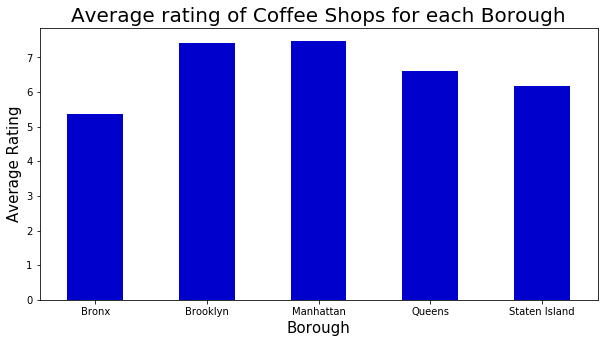

In [51]:
coffee_shops_stats_ny.groupby('Borough').mean()['Rating'].plot.bar(figsize=(10,5), color=clr)
plt.title('Average rating of Coffee Shops for each Borough', fontsize=20)
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

### Filtering Neighborhoods with Average Rating is Bigger or Equal to 8

In [52]:
ny_ngh_stats_top = ny_ngh_stats[ny_ngh_stats['Average Rating']>=8.0]
ny_ngh_stats_top

Borough       Neighborhood  Average Rating  Number of Likes  \
9        Brooklyn        Boerum Hill        8.000000       134.500000   
11       Brooklyn   Brooklyn Heights        8.000000        83.000000   
16      Manhattan            Chelsea        8.166667       448.000000   
17  Staten Island            Chelsea        8.166667       448.000000   
18      Manhattan          Chinatown        9.000000       195.000000   
25       Brooklyn        Ditmas Park        8.000000       229.000000   
27       Brooklyn              Dumbo        8.250000       455.000000   
29      Manhattan       East Village        8.000000       260.500000   
32       Brooklyn           Flatbush        8.000000        83.000000   
33      Manhattan           Flatiron        8.000000       116.000000   
34       Brooklyn        Fort Greene        8.000000       341.333333   
36       Brooklyn       Fulton Ferry        8.000000        50.000000   
40      Manhattan  Greenwich Village        8.500000       150.500000   
44         Queens      Hunters Point        8.000000       298.500000   
51      Manhattan       Little Italy        8.000000       266.833333   
54      Manhattan    Lower East Side        8.500000       166.500000   
58      Manhattan            Midtown        8.200000       355.600000   
59      Manhattan      Midtown South        8.500000       682.000000   
65      Manhattan               Noho        8.000000       202.250000   
69       Brooklyn         Ocean Hill        8.000000        33.000000   
73       Brooklyn   Prospect Heights        8.000000       159.000000   
75      Manhattan               Soho        8.000000      1246.500000   
83      Manhattan         Tudor City        8.000000       136.000000   
87          Bronx           Van Nest        8.000000        47.000000   
91      Manhattan       West Village        8.000000       213.333333   
93       Brooklyn    Windsor Terrace        8.000000       116.000000   

     Latitude  Longitude  
9   40.685683 -73.983748  
11  40.695864 -73.993782  
16  40.744035 -74.003116  
17  40.594726 -74.189560  
18  40.715618 -73.994279  
25  40.643675 -73.961013  
27  40.703176 -73.988753  
29  40.727847 -73.982226  
32  40.636326 -73.958401  
33  40.739673 -73.990947  
34  40.688527 -73.972906  
36  40.703281 -73.995508  
40  40.726933 -73.999914  
44  40.743414 -73.953868  
51  40.719324 -73.997305  
54  40.717807 -73.980890  
58  40.754691 -73.981669  
59  40.748510 -73.988713  
65  40.723259 -73.988434  
69  40.678403 -73.913068  
73  40.676822 -73.964859  
75  40.722184 -74.000657  
83  40.746917 -73.971219  
87  40.843608 -73.866299  
91  40.734434 -74.006180  
93  40.656946 -73.980073

In [53]:
ny_ngh_stats_top.dtypes

Borough             object
Neighborhood        object
Average Rating     float64
Number of Likes    float64
Latitude           float64
Longitude          float64
dtype: object

In [54]:
ny_ngh_stats_top.shape

(26, 6)

### Top Neighborhoods for Coffee Shops

In [56]:
ny_ngh_stats_top=pd.merge(ny_ngh_stats_top,ny_ngh, on='Neighborhood')
ny_ngh_stats_top=ny_ngh_stats_top[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_ngh_stats_top

Borough       Neighborhood   Latitude  Longitude  Average Rating
0        Brooklyn        Boerum Hill  40.685683 -73.983748        8.000000
1        Brooklyn   Brooklyn Heights  40.695864 -73.993782        8.000000
2       Manhattan            Chelsea  40.744035 -74.003116        8.166667
3   Staten Island            Chelsea  40.594726 -74.189560        8.166667
4       Manhattan            Chelsea  40.744035 -74.003116        8.166667
5   Staten Island            Chelsea  40.594726 -74.189560        8.166667
6       Manhattan            Chelsea  40.744035 -74.003116        8.166667
7   Staten Island            Chelsea  40.594726 -74.189560        8.166667
8       Manhattan            Chelsea  40.744035 -74.003116        8.166667
9   Staten Island            Chelsea  40.594726 -74.189560        8.166667
10      Manhattan          Chinatown  40.715618 -73.994279        9.000000
11       Brooklyn        Ditmas Park  40.643675 -73.961013        8.000000
12       Brooklyn              Dumbo  40.703176 -73.988753        8.250000
13      Manhattan       East Village  40.727847 -73.982226        8.000000
14       Brooklyn           Flatbush  40.636326 -73.958401        8.000000
15      Manhattan           Flatiron  40.739673 -73.990947        8.000000
16       Brooklyn        Fort Greene  40.688527 -73.972906        8.000000
17       Brooklyn       Fulton Ferry  40.703281 -73.995508        8.000000
18      Manhattan  Greenwich Village  40.726933 -73.999914        8.500000
19         Queens      Hunters Point  40.743414 -73.953868        8.000000
20      Manhattan       Little Italy  40.719324 -73.997305        8.000000
21      Manhattan    Lower East Side  40.717807 -73.980890        8.500000
22      Manhattan            Midtown  40.754691 -73.981669        8.200000
23      Manhattan      Midtown South  40.748510 -73.988713        8.500000
24      Manhattan               Noho  40.723259 -73.988434        8.000000
25       Brooklyn         Ocean Hill  40.678403 -73.913068        8.000000
26       Brooklyn   Prospect Heights  40.676822 -73.964859        8.000000
27      Manhattan               Soho  40.722184 -74.000657        8.000000
28      Manhattan         Tudor City  40.746917 -73.971219        8.000000
29          Bronx           Van Nest  40.843608 -73.866299        8.000000
30      Manhattan       West Village  40.734434 -74.006180        8.000000
31       Brooklyn    Windsor Terrace  40.656946 -73.980073        8.000000

### Final Data Frame - All Coffee Shops with Address Details 

In [57]:
nyc_coffee_shops=pd.merge(coffee_shops_stats_ny,ny_ngh, on=['Neighborhood','Borough'])
nyc_coffee_shops=nyc_coffee_shops[['Borough','Neighborhood','Latitude','Longitude','Name','Likes','Rating','Tips']]
nyc_coffee_shops.head(20)

Borough      Neighborhood   Latitude  Longitude  \
0   Manhattan       Marble Hill  40.876551 -73.910660   
1       Bronx           Norwood  40.877224 -73.879391   
2       Bronx           Norwood  40.877224 -73.879391   
3       Bronx    Pelham Parkway  40.857413 -73.854756   
4       Bronx        West Farms  40.839475 -73.877745   
5       Bronx          Van Nest  40.843608 -73.866299   
6       Bronx   North Riverdale  40.908543 -73.904531   
7    Brooklyn         Bay Ridge  40.625801 -74.030621   
8    Brooklyn         Bay Ridge  40.625801 -74.030621   
9    Brooklyn        Greenpoint  40.730201 -73.954241   
10   Brooklyn        Greenpoint  40.730201 -73.954241   
11   Brooklyn        Greenpoint  40.730201 -73.954241   
12   Brooklyn        Greenpoint  40.730201 -73.954241   
13   Brooklyn        Greenpoint  40.730201 -73.954241   
14   Brooklyn    Brighton Beach  40.576825 -73.965094   
15   Brooklyn          Flatbush  40.636326 -73.958401   
16   Brooklyn     Crown Heights  40.670829 -73.943291   
17   Brooklyn   Windsor Terrace  40.656946 -73.980073   
18   Brooklyn  Prospect Heights  40.676822 -73.964859   
19   Brooklyn  Prospect Heights  40.676822 -73.964859   

                           Name  Likes  Rating  Tips  
0                     Starbucks      7       7     0  
1           Nicky's Coffee Shop     12       7    11  
2                             0      0       0     0  
3   Liberty Donut & Coffee Shop     14       7     8  
4                             0      0       0     0  
5         Conti's Pastry Shoppe     47       8    15  
6            Noni's Coffee Shop      8       7     5  
7                    Caffe Café      7       7     2  
8              Mocha Mocha Cafe     49       6    38  
9                    Homecoming    213       8    43  
10                      odd fox     33       8     6  
11                        Maman    166       8    36  
12               Upright Coffee    157       7    48  
13             Café de Colombia     18       7     3  
14                    Starbucks    130       6    37  
15                   Coffee Mob     83       8    29  
16          Jenny Coffe Shop #2      6       6     4  
17   DUB Pies - Windsor Terrace    116       8    61  
18                 Sit & Wonder    299       8   115  
19        Gran Caffe De Martini     19       8     4

In [58]:
# The code was removed by Watson Studio for sharing.

### Average Neighborhood Rating in Coffee Shops

In [59]:
nyc_map = folium.Map(location=geo_location('New York'), zoom_start=11)
nyc_geo = r'nyc_zip_codes.geojson'
nyc_map.choropleth(
    geo_data=nyc_geo,
    data=ny_ngh_stats,
    columns=['Neighborhood', 'Average Rating'],
    key_on='feature.properties.PO_NAME',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Rating'
)

# as this is huge map data , we will save it to a file
nyc_map.save('nyc_neighborhood_avg_rating.html')

# display map
nyc_map

### Average Borough Rating in Coffee Shops

In [60]:
nyc_map = folium.Map(location=geo_location('New York'), zoom_start=11)
nyc_geo = r'NYC_Borough_Boundaries.geojson'
nyc_map.choropleth(
    geo_data=nyc_geo,
    data=ny_brg_stats,
    columns=['Borough', 'Average Rating'],
    key_on='feature.properties.boro_name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Rating'
)

# as this is huge map data , we will save it to a file
nyc_map.save('nyc_borough_avg_rating.html')

# display map
nyc_map

### Top Neighborhoods for a Coffee Shop and Their Average Likes 

In [61]:
# create map and display it
best_coffe_shop_ngh_map = folium.Map(location=geo_location('New York'), 
                                  zoom_start=11,
                                  )

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through and add each to the feature group
for lat, lng, in ny_ngh_stats_top[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
    
ny_ngh_stats_top['Label']=ny_ngh_stats_top['Neighborhood']+', '+ny_ngh_stats_top['Borough']+'('+ny_ngh_stats_top['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in ny_ngh_stats_top[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(best_coffe_shop_ngh_map)        
# add incidents to map
best_coffe_shop_ngh_map.add_child(incidents)

# as this is huge map data , we will save it to a file
best_coffe_shop_ngh_map.save('nyc_top_ngh_for_coffee_shops.html')

# display map
best_coffe_shop_ngh_map

### Top 10 Coffee Shops in New York City

In [62]:
best_coffee_shops_ny = nyc_coffee_shops.sort_values(['Likes','Rating','Tips'],ascending=False)[:10]
best_coffee_shops_ny.index = np.arange(1, len(best_coffee_shops_ny) + 1)
best_coffee_shops_ny

Borough   Neighborhood   Latitude  Longitude                       Name  \
1   Manhattan  Midtown South  40.748510 -73.988713  Stumptown Coffee Roasters   
2   Manhattan           Soho  40.722184 -74.000657             Ground Support   
3    Brooklyn          Dumbo  40.703176 -73.988753  Brooklyn Roasting Company   
4   Manhattan        Chelsea  40.744035 -74.003116         Blue Bottle Coffee   
5   Manhattan   Little Italy  40.719324 -73.997305                Happy Bones   
6   Manhattan           Soho  40.722184 -74.000657                Happy Bones   
7   Manhattan        Midtown  40.754691 -73.981669         Blue Bottle Coffee   
8   Manhattan        Chelsea  40.744035 -74.003116      Intelligentsia Coffee   
9   Manhattan   West Village  40.734434 -74.006180                    The ELK   
10  Manhattan  Carnegie Hill  40.782683 -73.953256                       DTUT   

    Likes  Rating  Tips  
1    2437       9   690  
2    1638       8   515  
3    1512       9   317  
4    1084       8   269  
5     855       8   208  
6     855       8   208  
7     731       9   145  
8     725       9   178  
9     546       8   114  
10    517       8   152

In [63]:
# create map and display it
best_coffe_shops_map = folium.Map(location=geo_location('New York'), 
                                  zoom_start=11)

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through and add each to the feature group
for lat, lng, in best_coffee_shops_ny[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
    
best_coffee_shops_ny['Label']=best_coffee_shops_ny['Name']+', '+best_coffee_shops_ny['Neighborhood']+', '+best_coffee_shops_ny['Borough']
# add pop-up text to each marker on the map
for lat, lng, label in best_coffee_shops_ny[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(best_coffe_shops_map)        
# add incidents to map
best_coffe_shops_map.add_child(incidents)

# as this is huge map data , we will save it to a file
best_coffe_shops_map.save('nyc_top_coffee_shops.html')

# display map
best_coffe_shops_map

### Top 25 Coffee Shops in New York City

In [65]:
top25_coffee_shops_ny = nyc_coffee_shops.sort_values(['Likes','Rating','Tips'],ascending=False)[:25]
top25_coffee_shops_ny.index = np.arange(1, len(top25_coffee_shops_ny) + 1)
top25_coffee_shops_ny

Borough         Neighborhood   Latitude  Longitude  \
1   Manhattan        Midtown South  40.748510 -73.988713   
2   Manhattan                 Soho  40.722184 -74.000657   
3    Brooklyn                Dumbo  40.703176 -73.988753   
4   Manhattan              Chelsea  40.744035 -74.003116   
5   Manhattan         Little Italy  40.719324 -73.997305   
6   Manhattan                 Soho  40.722184 -74.000657   
7   Manhattan              Midtown  40.754691 -73.981669   
8   Manhattan              Chelsea  40.744035 -74.003116   
9   Manhattan         West Village  40.734434 -74.006180   
10  Manhattan        Carnegie Hill  40.782683 -73.953256   
11     Queens        Hunters Point  40.743414 -73.953868   
12   Brooklyn           North Side  40.714823 -73.958809   
13   Brooklyn          Fort Greene  40.688527 -73.972906   
14   Brooklyn           North Side  40.714823 -73.958809   
15  Manhattan              Tribeca  40.721522 -74.010683   
16  Manhattan   Financial District  40.707107 -74.010665   
17  Manhattan              Midtown  40.754691 -73.981669   
18  Manhattan              Midtown  40.754691 -73.981669   
19  Manhattan  Morningside Heights  40.808000 -73.963896   
20   Brooklyn          Fort Greene  40.688527 -73.972906   
21  Manhattan   Financial District  40.707107 -74.010665   
22  Manhattan         East Village  40.727847 -73.982226   
23  Manhattan          Murray Hill  40.748303 -73.978332   
24  Manhattan                 Noho  40.723259 -73.988434   
25  Manhattan              Chelsea  40.744035 -74.003116   

                              Name  Likes  Rating  Tips  
1        Stumptown Coffee Roasters   2437       9   690  
2                   Ground Support   1638       8   515  
3        Brooklyn Roasting Company   1512       9   317  
4               Blue Bottle Coffee   1084       8   269  
5                      Happy Bones    855       8   208  
6                      Happy Bones    855       8   208  
7               Blue Bottle Coffee    731       9   145  
8            Intelligentsia Coffee    725       9   178  
9                          The ELK    546       8   114  
10                            DTUT    517       8   152  
11                       Sweetleaf    493       8   201  
12                       Sweatshop    458       8   112  
13              Greene Grape Annex    443       8   122  
14                     Black Brick    441       8   163  
15                      Kaffe 1668    422       8   118  
16            Black Fox Coffee Co.    407       9    96  
17                 Gregorys Coffee    399       7   154  
18                  Bluestone Lane    397       8    77  
19              Joe Coffee Company    396       7   134  
20                    Hungry Ghost    376       8    69  
21                       Starbucks    374       7    75  
22           Ninth Street Espresso    359       8   129  
23                       Perk Kafe    344       8   106  
24  Caffe Vita Coffee Roasting Co.    317       8    97  
25           Ninth Street Espresso    305       8   157

In [66]:
# create map and display it
top25_coffe_shops_map = folium.Map(location=geo_location('New York'), 
                                  zoom_start=11)

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through and add each to the feature group
for lat, lng, in top25_coffee_shops_ny[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
    
top25_coffee_shops_ny['Label']=top25_coffee_shops_ny['Name']+', '+top25_coffee_shops_ny['Neighborhood']+', '+top25_coffee_shops_ny['Borough']
# add pop-up text to each marker on the map
for lat, lng, label in top25_coffee_shops_ny[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(top25_coffe_shops_map)        
# add incidents to map
top25_coffe_shops_map.add_child(incidents)

# as this is huge map data , we will save it to a file
top25_coffe_shops_map.save('nyc_top_25_coffee_shops.html')

# display map
top25_coffe_shops_map